<a href="https://colab.research.google.com/github/ShreeyashGo/CTE_Intro2ML_Workshop/blob/main/Q1/Q1_Intro2ML_CTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

For Make_Moons


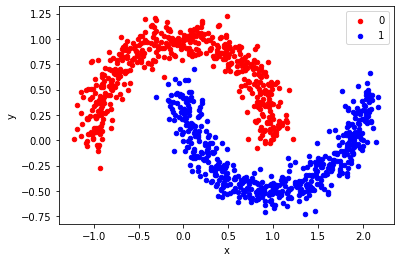

(800, 2) (800,) (200, 2) (200,)


In [7]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
# generate 2d classification dataset
X, y = make_moons(n_samples=1000, noise=0.1)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size = 0.2, random_state= 7)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [8]:
from sklearn.linear_model import LogisticRegression
LReg = LogisticRegression(random_state = 0)
LReg.fit(X_train, y_train)
y_pred = LReg.predict(X_test)
print("Logistic Regression accuracy: ", accuracy_score(y_test, y_pred))

Logistic Regression accuracy:  0.88


Here the accuracy is 80%. It is evident that its not as high as the others due to the non linearity in the data

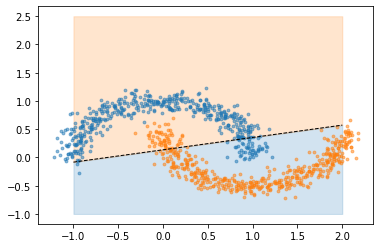

In [9]:
# a code from "https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/" to get a visualization as to what is happening

# Retrieve the model parameters.
b = LReg.intercept_[0]
w1, w2 = LReg.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 2
ymin, ymax = -1, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*X[y==0].T, s=8, alpha=0.5)
plt.scatter(*X[y==1].T, s=8, alpha=0.5)

plt.show()

In [10]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Decision Tree accuracy: ", accuracy_score(y_test, y_pred))

Decision Tree accuracy:  0.995


As the decision boundary is not linear we get a fairly high accuracy

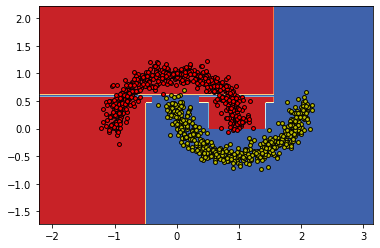

In [11]:
# Plot the decision boundary inspired by "https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#plot-the-decision-surface-of-decision-trees-trained-on-the-iris-dataset"
plot_step = 0.02
plot_colors = "ryb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
)
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Plot the training points
for i, color in zip(range(2), plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        # label=sklearn.datasets.make_moons.target_names[i],
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_train, y_train)
y_pred = kmeans.predict(X_test)
print("Kmeans accuracy: ", accuracy_score(y_test, y_pred))

Kmeans accuracy:  0.745


The accuracy is low as the data is quite dense and as a result clustering is not efficient 


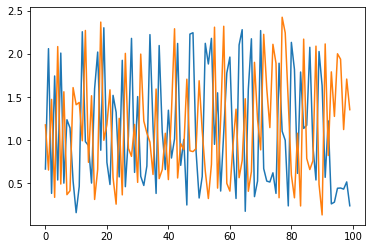

In [13]:
#this shows the distance of the points wrt the 2 cluster centers
plt.plot(kmeans.transform(X_train[:100]))
plt.show()
#the distance between the 2 centres for many points is not very different

In [14]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM accuracy: ", accuracy_score(y_test, y_pred))

SVM accuracy:  1.0


The non linear SVM we implemented predicts with a high accuracy almost perfectly even on the test data

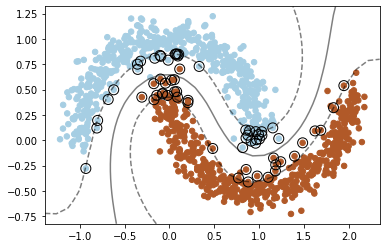

In [17]:
#plotting the hyperplane

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()


In [18]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(random_state = 1, max_iter = 350, solver = 'adam')
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
print("NN accuracy: ", accuracy_score(y_test, y_pred))

NN accuracy:  0.995


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLP works quite well for less iterations as well as it has non linear decision boundary!!

For Make_blobs

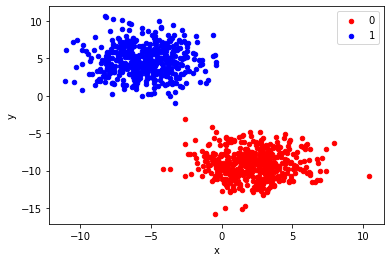

(800, 2) (800,) (200, 2) (200,)


In [41]:
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers = 2, cluster_std=2)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size = 0.2, random_state= 7)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [42]:
from sklearn.linear_model import LogisticRegression
LReg = LogisticRegression(random_state = 0)
LReg.fit(X_train, y_train)
y_pred = LReg.predict(X_test)
print("Logistic Regression accuracy: ", accuracy_score(y_test, y_pred))

Logistic Regression accuracy:  1.0


Here the accuracy is 80%. It is evident that its not as high as the others due to the non linearity in the data

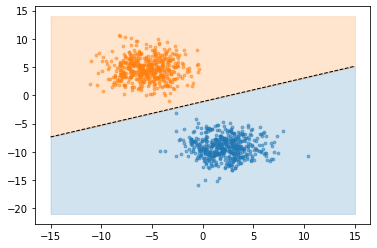

In [45]:
# a code from "https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/" to get a visualization as to what is happening

# Retrieve the model parameters.
b = LReg.intercept_[0]
w1, w2 = LReg.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -15, 15
ymin, ymax = -21, 14
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*X[y==0].T, s=8, alpha=0.5)
plt.scatter(*X[y==1].T, s=8, alpha=0.5)

plt.show()

In [46]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Decision Tree accuracy: ", accuracy_score(y_test, y_pred))

Decision Tree accuracy:  1.0


As the decision boundary is not linear we get a fairly high accuracy

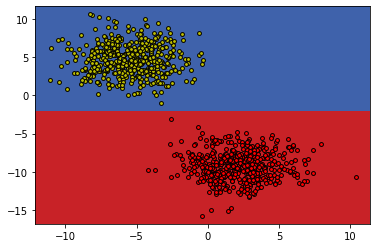

In [47]:
# Plot the decision boundary inspired by "https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#plot-the-decision-surface-of-decision-trees-trained-on-the-iris-dataset"
plot_step = 0.02
plot_colors = "ryb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
)
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Plot the training points
for i, color in zip(range(2), plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        # label=sklearn.datasets.make_moons.target_names[i],
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_train, y_train)
y_pred = kmeans.predict(X_test)
print("Kmeans accuracy: ", accuracy_score(y_test, y_pred))

Kmeans accuracy:  1.0


The accuracy is low as the data is quite dense and as a result clustering is not efficient 


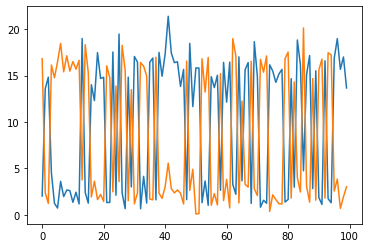

In [49]:
#this shows the distance of the points wrt the 2 cluster centers
plt.plot(kmeans.transform(X_train[:100]))
plt.show()
#the distance from the 2 means is very different

In [50]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM accuracy: ", accuracy_score(y_test, y_pred))

SVM accuracy:  1.0


The non linear SVM we implemented predicts with a high accuracy almost perfectly even on the test data

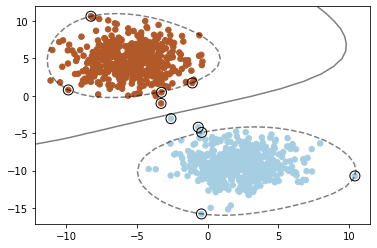

In [51]:
#plotting the hyperplane

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()


In [52]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(random_state = 1, max_iter = 350, solver = 'adam')
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
print("NN accuracy: ", accuracy_score(y_test, y_pred))

NN accuracy:  1.0


MLP works quite well for less iterations as well as it has non linear decision boundary!!

Hence we see as make_blobs is a very clustered dataset and hence a linear decision boundary suffices to classfiy with a high accuracy. Also as it is clusters are well seperated even non linear boundaries work well on classifications.



---


Conversely
the make_moons has clusters which are not sperated linearly and hence simple linear regression does not perform well. However, the non-linear classifiers works very well.